# Mean Variance Optimization

The monthly cum-dividend returns for 27 selected stocks and the S&P 500 index from CRSP was retrieved from 2000 to 2023.

-> The data was compiled into an Excel file named "returns.xlsx," which contains two sheets: “dj27returns” and “sp500.” 

-> The “dj27returns” sheet includes key variables such as PERMNO, DATE, COMNAM, TICKER, PRC, RET, and SHROUT, reflecting the monthly stock returns. 

-> The “sp500” sheet contains all relevant variables for the S&P 500 index over the same period. Each sheet is structured with variable names in the first row, followed by the corresponding data points.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import skew, kurtosis
from scipy.optimize import minimize

In [154]:
dj_returns = pd.read_excel("returns.xlsx", sheet_name="dj27returns")
sp500_returns = pd.read_excel("returns.xlsx", sheet_name="sp500")

In [155]:
def stats_calc(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    skewness = skew(data)
    kurt = kurtosis(data)
    annualized_mean = (1 + mean) ** 12 - 1
    annualized_std_dev = std_dev * np.sqrt(12)
    return mean, std_dev, skewness, kurt, annualized_mean, annualized_std_dev

# S&P 500 returns
sp500_ret = sp500_returns['Value-Weighted Return-incl. dividends']
sp500_mean, sp500_std_dev, sp500_skewness, sp500_kurt, sp500_annualized_mean, sp500_annualized_std_dev = stats_calc(sp500_ret)

# calculation for 27 stocks
stocks_stats = {}
for permno in dj_returns['PERMNO'].unique():
    stock_data = dj_returns[dj_returns['PERMNO'] == permno]['RET']
    stock_mean, stock_std_dev, stock_skewness, stock_kurt, stock_annualized_mean, stock_annualized_std_dev = stats_calc(stock_data)
    
    stocks_stats[permno] = {
        'mean': round(stock_mean, 4),
        'std_dev': round(stock_std_dev, 4),
        'skewness': round(stock_skewness, 4),
        'kurtosis': round(stock_kurt, 4),
        'annualized_mean': round(stock_annualized_mean, 4),
        'annualized_std_dev': round(stock_annualized_std_dev, 4)
    }

# 5% Value at Risk (VaR)
VaR_5_percent = sp500_mean - 1.645 * sp500_std_dev

print("S&P 500 Statistics:")
print("Mean:", round(sp500_mean, 4))
print("Standard Deviation:", round(sp500_std_dev, 4))
print("Skewness:", round(sp500_skewness, 4))
print("Kurtosis:", round(sp500_kurt, 4))
print("Annualized Mean:", round(sp500_annualized_mean, 4))
print("Annualized Standard Deviation:", round(sp500_annualized_std_dev, 4))
print("5% Value at Risk (VaR):", round(VaR_5_percent, 4), "\n")

print("27 stock Statistics:")
for permno, stats in stocks_stats.items():
    print("Stock", permno, ":")
    for key, value in stats.items():
        print("  " + key + ":", round(value, 4))
    print()


S&P 500 Statistics:
Mean: 0.0068
Standard Deviation: 0.0445
Skewness: -0.4559
Kurtosis: 0.7007
Annualized Mean: 0.0845
Annualized Standard Deviation: 0.154
5% Value at Risk (VaR): -0.0664 

27 stock Statistics:
Stock 10107 :
  mean: 0.0114
  std_dev: 0.0811
  skewness: 0.2232
  kurtosis: 3.171
  annualized_mean: 0.1462
  annualized_std_dev: 0.2809

Stock 10145 :
  mean: 0.01
  std_dev: 0.0819
  skewness: -0.0672
  kurtosis: 7.4412
  annualized_mean: 0.1264
  annualized_std_dev: 0.2838

Stock 11308 :
  mean: 0.006
  std_dev: 0.05
  skewness: -0.4928
  kurtosis: 1.1453
  annualized_mean: 0.0746
  annualized_std_dev: 0.1731

Stock 12490 :
  mean: 0.0062
  std_dev: 0.0712
  skewness: 0.4042
  kurtosis: 3.432
  annualized_mean: 0.0768
  annualized_std_dev: 0.2467

Stock 14008 :
  mean: 0.0092
  std_dev: 0.0729
  skewness: 0.5252
  kurtosis: 1.6976
  annualized_mean: 0.1157
  annualized_std_dev: 0.2524

Stock 14541 :
  mean: 0.0097
  std_dev: 0.0683
  skewness: 0.4193
  kurtosis: 2.0506
  an

### Interpretation of S&P 500 Skewness and Kurtosis:

### Skewness (-0.4559):
The negative skewness indicates that the distribution of S&P 500 returns is left-skewed, which means that there is a higher probability of extreme negative returns compared to a normal distribution. This means that occasional significant losses are expected.

### Kurtosis (0.7007):
The kurtosis value is less than 3 and this suggests that the return distribution is platykurtic, i.e. it has thinner tails and a lower peak than a normal distribution. This means lesser outliers compared to a normal distribution. The market return distribution deviates from normality, showing fewer extreme fluctuations than a normal distribution.

### 5% Value at Risk (VaR):

VaR is a measure of the potential loss in value of an investment over a specified time period for a given confidence interval. The 5% VaR represents the worst loss you could experience 5% of the time.

**Formula:**  
$$ \text{VaR}_{0.05} = \mu - 1.645 \times \sigma $$

The 5% VaR gives you an idea of the maximum loss you could expect in one month with 95% confidence.

The 5% Value at Risk (VaR) of -0.0665 implies that, with 95% confidence, the worst expected loss for the S&P 500 in a given month will not exceed -6.65%. In other words, there is a 5% probability that the market return could fall below this threshold, showing the potential downside risk for investors.

The S&P 500 index return is the monthly total return (Value-Weighted Return-incl. dividends), as it includes dividends and provides a comprehensive view of long-term performance trends while minimizing short-term fluctuations.

/var/folders/c0/qh7w74pn7x5f5q81vn0wf7480000gn/T/ipykernel_63849/3438807541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dj27returns['DATE'] = pd.to_datetime(dj27returns['DATE'], format='%Y-%m')
/var/folders/c0/qh7w74pn7x5f5q81vn0wf7480000gn/T/ipykernel_63849/3438807541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dj27returns['DATE'] = dj27returns['DATE'].dt.date


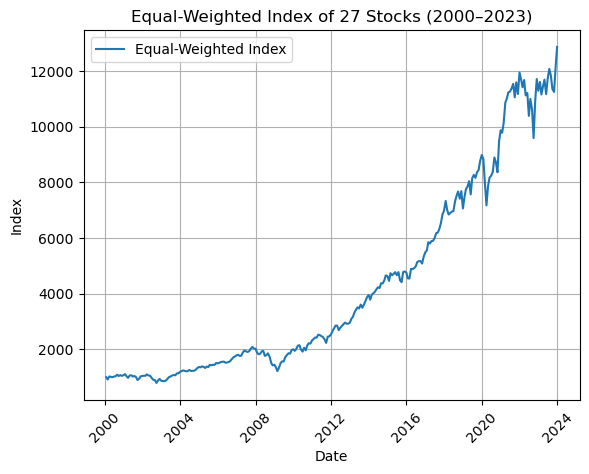

Minimum index value: 793.9825 on 2002-09-30
Maximum index value: 12864.1709 on 2023-12-29


In [156]:
dj27returns = dj_returns[['PERMNO', 'DATE', 'RET']]
dj27returns['DATE'] = pd.to_datetime(dj27returns['DATE'], format='%Y-%m')
dj27returns['DATE'] = dj27returns['DATE'].dt.date

monthly_avg_returns = dj27returns.groupby('DATE')['RET'].mean().reset_index()

index_values = [1000]
dates = monthly_avg_returns['DATE']
for i in range(1, len(monthly_avg_returns)):
    monthly_return = monthly_avg_returns['RET'].iloc[i]
    new_index_value = index_values[-1] * (1 + monthly_return)
    index_values.append(new_index_value)

index_df = pd.DataFrame({
    'DATE': dates,
    'Index': index_values
})

plt.plot(index_df['DATE'], index_df['Index'], label='Equal-Weighted Index')
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Equal-Weighted Index of 27 Stocks (2000–2023)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

min_index_value = index_df['Index'].min()
max_index_value = index_df['Index'].max()

min_index_month = index_df.loc[index_df['Index'] == min_index_value, 'DATE'].iloc[0]
max_index_month = index_df.loc[index_df['Index'] == max_index_value, 'DATE'].iloc[0]

print("Minimum index value:", round(min_index_value, 4), "on", min_index_month)
print("Maximum index value:", round(max_index_value, 4), "on", max_index_month)


In [157]:
returns_data = dj_returns.pivot_table(index='DATE', columns='PERMNO', values='RET')

cov_matrix = returns_data.cov()
expected_returns = returns_data.mean()
n_assets = len(expected_returns)

def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

def weight_constraint(weights):
    return np.sum(weights) - 1

# Initial guess for weights (equally distributed among the 27 stocks)
initial_weights = np.ones(n_assets) / n_assets

constraints = ({'type': 'eq', 'fun': weight_constraint})

result = minimize(portfolio_variance, initial_weights, args=(cov_matrix,), constraints=constraints)
optimal_weights = result.x
portfolio_return = np.dot(optimal_weights, expected_returns)
portfolio_risk = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))

stock_weights = zip(dj_returns['PERMNO'].unique(), optimal_weights)

print("Global Minimum Variance Portfolio Weights:")
for permno, weight in stock_weights:
    print("Stock", permno, ":", round(weight, 4))

print("Expected Return of GMVP:", round(portfolio_return, 4))
print("Standard Deviation of GMVP:", round(portfolio_risk, 4))

Global Minimum Variance Portfolio Weights:
Stock 10107 : 0.0401
Stock 10145 : -0.0495
Stock 11308 : 0.1065
Stock 12490 : 0.048
Stock 14008 : 0.0722
Stock 14541 : 0.049
Stock 14593 : 0.039
Stock 18163 : 0.1495
Stock 18542 : -0.0549
Stock 19502 : 0.0336
Stock 19561 : -0.0234
Stock 22111 : 0.1025
Stock 22592 : 0.0443
Stock 22752 : 0.0611
Stock 26403 : 0.0072
Stock 43449 : 0.0651
Stock 47896 : -0.0106
Stock 55976 : 0.1289
Stock 57665 : 0.0194
Stock 59176 : -0.0474
Stock 59328 : 0.0072
Stock 59459 : 0.0324
Stock 65875 : 0.0716
Stock 66181 : 0.0336
Stock 76076 : 0.0053
Stock 86868 : -0.013
Stock 92655 : 0.0826
Expected Return of GMVP: 0.0083
Standard Deviation of GMVP: 0.0331


Target Return: 0.0015
Stock Weights:
  Stock 10107 : -0.0048
  Stock 10145 : -0.0964
  Stock 11308 : 0.1675
  Stock 12490 : 0.1167
  Stock 14008 : 0.0172
  Stock 14541 : 0.0909
  Stock 14593 : -0.0836
  Stock 18163 : 0.1994
  Stock 18542 : -0.1669
  Stock 19502 : 0.0904
  Stock 19561 : -0.0671
  Stock 22111 : 0.1131
  Stock 22592 : 0.1342
  Stock 22752 : 0.0273
  Stock 26403 : 0.0934
  Stock 43449 : 0.0219
  Stock 47896 : -0.0226
  Stock 55976 : 0.2087
  Stock 57665 : -0.0698
  Stock 59176 : -0.0076
  Stock 59328 : 0.0656
  Stock 59459 : -0.0071
  Stock 65875 : 0.1336
  Stock 66181 : 0.0289
  Stock 76076 : 0.0489
  Stock 86868 : 0.0486
  Stock 92655 : -0.0803
Mean Return: 0.0015
Standard Deviation: 0.0376


Target Return: 0.0091
Stock Weights:
  Stock 10107 : 0.0406
  Stock 10145 : -0.0526
  Stock 11308 : 0.103
  Stock 12490 : 0.0418
  Stock 14008 : 0.0712
  Stock 14541 : 0.0496
  Stock 14593 : 0.0586
  Stock 18163 : 0.1527
  Stock 18542 : -0.0467
  Stock 19502 : 0.0225
  Stock 19561 :

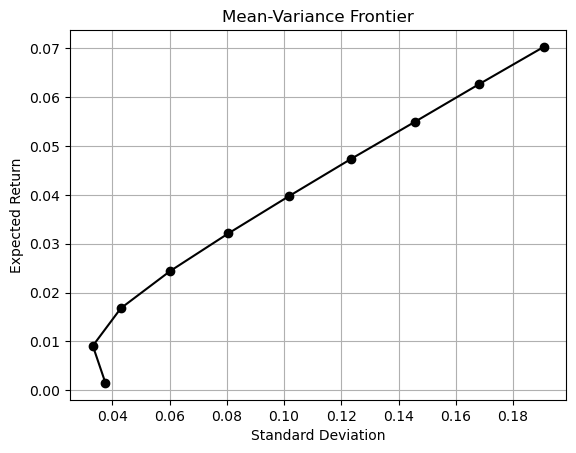

In [170]:
average_returns = returns_data.mean()
cov_matrix = returns_data.cov()

Rlow = average_returns.min()
Rhigh = average_returns.max()

delta_R = (3 * Rhigh - Rlow/3) / 10

target_returns = np.arange(Rlow / 3, 3 * Rhigh, delta_R)

def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

def portfolio_return(weights, mean_returns):
    return np.dot(weights.T, mean_returns)

def weight_constraint(weights):
    return np.sum(weights) - 1

results = []

for target_return in target_returns:
    # Initial guess for weights (equal distribution)
    initial_weights = np.ones(len(average_returns)) / len(average_returns)

    constraints = [
        {'type': 'eq', 'fun': weight_constraint},
        {'type': 'eq', 'fun': lambda weights: portfolio_return(weights, average_returns) - target_return}
    ]

    bounds = [(-10000000000, 100000000000) for i in range(len(average_returns))]

    result = minimize(fun=portfolio_variance, x0=initial_weights, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

    optimal_weights = result.x
    portfolio_mean = portfolio_return(optimal_weights, average_returns)
    portfolio_std = np.sqrt(portfolio_variance(optimal_weights, cov_matrix))

    # rounding up
    rounded_weights = [round(w, 4) for w in optimal_weights]
    rounded_mean = round(portfolio_mean, 4)
    rounded_std = round(portfolio_std, 4)

    results.append((rounded_weights, rounded_mean, rounded_std))

table_data = []
permnos = returns_data.columns  # This will hold the stock identifiers (PERMNO)

for i, (weights, mean, std) in enumerate(results):
    print("Target Return:", round(target_returns[i], 4))
    
    print("Stock Weights:")
    for j, weight in enumerate(weights):
        print("  Stock", permnos[j], ":", round(weight, 4))  # Directly printing without formatting
    
    print("Mean Return:", round(mean, 4))
    print("Standard Deviation:", round(std, 4))
    print("\n")

result_df = pd.DataFrame(table_data)

from tabulate import tabulate

# Set display options for pandas
pd.set_option('display.max_columns', 5)  # Limit number of columns displayed
pd.set_option('display.width', 1000)      # Increase the width of the table display

# Convert DataFrame to a table format
table = tabulate(result_df, headers='keys', tablefmt='pretty', showindex=False)
print(table)

means = [result[1] for result in results]
std_devs = [result[2] for result in results]

plt.plot(std_devs, means, marker='o', color='black')
plt.title('Mean-Variance Frontier')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')
plt.grid(True)
plt.show()

In [159]:
rf = 0.001
A = 10
E_rp = average_returns.mean()

weights = np.ones(len(average_returns)) / len(average_returns)
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
optimal_weight = (E_rp - rf) / (A * portfolio_variance)

print("Expected Return of Risky Portfolio (E(r_p)):", round(E_rp,4))
print("Variance of Risky Portfolio (σ^2_p):", round(portfolio_variance,4))
print("Optimal Weight (y*):", round(optimal_weight,4))

Expected Return of Risky Portfolio (E(r_p)): 0.0098
Variance of Risky Portfolio (σ^2_p): 0.0019
Optimal Weight (y*): 0.4598


Optimal holding is 45.98% risky assets